# Parse the results and display them

In [1]:
import os
import sys
maindir = os.getcwd()
sys.path.append(maindir+"/src")

In [2]:
import pickle
import numpy as np
import torch
import matplotlib.pyplot as plt

In [3]:
# read data

# ridge regression
with open("results/ridge/rmse_ridge_bis.pkl", "rb") as f:
    rmse_ridge = pickle.load(f)

with open("results/ridge/w_ridge_bis.pkl", "rb") as f:
    w_ridge = pickle.load(f)

with open("results/ridge/weights_ridge_bis.pkl", "rb") as f:
    weights_ridge = pickle.load(f)

# ridge regression with low-rank constraint
with open("results/ridge_low_rank/rmse_ridge_lr_bis.pkl", "rb") as f:
    rmse_ridge_lowrank = pickle.load(f)

with open("results/ridge_low_rank/w_ridge_lr_bis.pkl", "rb") as f:
    w_ridge_lowrank = pickle.load(f)

with open("results/ridge_low_rank/weights_ridge_lr_bis.pkl", "rb") as f:
    weights_ridge_lowrank = pickle.load(f)


# robust regression
with open("results/robust/rmse_robust_bis.pkl", "rb") as f:
    rmse_robust = pickle.load(f)

with open("results/robust/w_robust_bis.pkl", "rb") as f:
    w_robust = pickle.load(f)

with open("results/robust/weights_robust_bis.pkl", "rb") as f:
    weights_robust = pickle.load(f)


# robust regression with low rank constraint
with open("results/robust_low_rank/rmse_robust_lr_bis.pkl", "rb") as f:
    rmse_robust_lowrank = pickle.load(f)

with open("results/robust_low_rank/w_robust_lr_bis.pkl", "rb") as f:
    w_robust_lowrank = pickle.load(f)

with open("results/robust_low_rank/weights_robust_lr_bis.pkl", "rb") as f:
    weights_robust_lowrank = pickle.load(f)


In [4]:
# # define range of values
# mu_range_tmp = np.array([100.0,500.0, 1000.0, 5000.0,10000.0])
# lambda_range_tmp = np.array([0.0,10.0,100.0, 1000.0])

# define range of values
mu_range_tmp = np.array([1.0, 5.0, 10.0, 50, 100.0,500.0, 1000.0])
lambda_range_tmp = np.array([0.0, 10.0,50.0,100.0,500.0, 1000.0, 5000.0, 10000.0])


# convert to dictionary of tensor 
rmse_ridge_tmp = {lambda_: torch.tensor(list(rmse_ridge[(lambda_,1.0)].values())) for lambda_ in lambda_range_tmp}
rmse_ridge_lowrank_tmp = {lambda_: torch.tensor(list(rmse_ridge_lowrank[(lambda_,1.0)].values())) for lambda_ in lambda_range_tmp}
rmse_robust_tmp = {(lambda_,mu_): torch.tensor(list(rmse_robust[(lambda_,mu_)].values())) for lambda_ in lambda_range_tmp for mu_ in mu_range_tmp}
rmse_robust_lowrank_tmp = {(lambda_,mu_): torch.tensor(list(rmse_robust_lowrank[(lambda_,mu_)].values())) for lambda_ in lambda_range_tmp for mu_ in mu_range_tmp}


# get worst and mean error of rmse ridge
rmse_ridge_worst_loo = {lambda_: torch.max(rmse_ridge_tmp[lambda_]).item() for lambda_ in lambda_range_tmp}
rmse_ridge_mean_loo = {lambda_: torch.mean(rmse_ridge_tmp[lambda_]).item() for lambda_ in lambda_range_tmp}

# get worst and mean error of rmse ridge low rank
rmse_ridge_lowrank_worst_loo = {lambda_: torch.max(rmse_ridge_lowrank_tmp[lambda_]).item() for lambda_ in lambda_range_tmp}
rmse_ridge_lowrank_mean_loo = {lambda_: torch.mean(rmse_ridge_lowrank_tmp[lambda_]).item() for lambda_ in lambda_range_tmp}

# get worst and mean error of rmse robust
rmse_robust_worst_loo = {(lambda_,mu_): torch.max(rmse_robust_tmp[(lambda_,mu_)]).item() for lambda_ in lambda_range_tmp for mu_ in mu_range_tmp}
rmse_robust_mean_loo = {(lambda_,mu_): torch.mean(rmse_robust_tmp[(lambda_,mu_)]).item() for lambda_ in lambda_range_tmp for mu_ in mu_range_tmp}

# get worst and mean error of rmse robust low rank
rmse_robust_lowrank_worst_loo = {(lambda_,mu_): torch.max(rmse_robust_lowrank_tmp[(lambda_,mu_)]).item() for lambda_ in lambda_range_tmp for mu_ in mu_range_tmp}
rmse_robust_lowrank_mean_loo = {(lambda_,mu_): torch.mean(rmse_robust_lowrank_tmp[(lambda_,mu_)]).item() for lambda_ in lambda_range_tmp for mu_ in mu_range_tmp}



In [9]:
rmse_ridge_tmp

{0.0: tensor([0.7006, 0.1124, 0.2422, 0.2347, 0.1827, 0.1538, 0.0935, 0.2481, 0.0885,
         0.0954, 1.1915, 0.0825, 0.0733, 0.1428, 0.1091, 0.1424, 0.2622, 0.1076,
         1.4933, 0.4957, 1.2304, 0.2263, 0.0856, 1.5977, 0.0728, 0.7003, 0.6258,
         0.1260, 0.7168, 0.1594, 0.1070, 0.3833, 0.1673, 0.6417]),
 10.0: tensor([0.6915, 0.1121, 0.2416, 0.2336, 0.1824, 0.1531, 0.0930, 0.2477, 0.0880,
         0.0947, 1.1753, 0.0822, 0.0730, 0.1428, 0.1087, 0.1424, 0.2615, 0.1067,
         1.4713, 0.4923, 1.2197, 0.2232, 0.0845, 1.5773, 0.0726, 0.6954, 0.6217,
         0.1229, 0.7044, 0.1590, 0.1064, 0.3774, 0.1667, 0.6399]),
 50.0: tensor([0.6703, 0.1115, 0.2401, 0.2307, 0.1816, 0.1517, 0.0918, 0.2466, 0.0869,
         0.0929, 1.1391, 0.0817, 0.0721, 0.1427, 0.1075, 0.1426, 0.2596, 0.1042,
         1.4188, 0.4826, 1.1876, 0.2155, 0.0822, 1.5304, 0.0719, 0.6825, 0.6129,
         0.1141, 0.6716, 0.1583, 0.1050, 0.3619, 0.1654, 0.6333]),
 100.0: tensor([0.6552, 0.1112, 0.2388, 0.2284, 0.180

In [5]:
# get the best (worst and mean) rmse for each method
best_worst_ridge = min(rmse_ridge_worst_loo, key=rmse_ridge_worst_loo.get)
best_worst_ridge_lowrank = min(rmse_ridge_lowrank_worst_loo, key=rmse_ridge_lowrank_worst_loo.get)
best_worst_robust = min(rmse_robust_worst_loo, key=rmse_robust_worst_loo.get)
best_worst_robust_lowrank = min(rmse_robust_lowrank_worst_loo, key=rmse_robust_lowrank_worst_loo.get)

best_mean_ridge = min(rmse_ridge_mean_loo, key=rmse_ridge_mean_loo.get)
best_mean_ridge_lowrank = min(rmse_ridge_lowrank_mean_loo, key=rmse_ridge_lowrank_mean_loo.get)
best_mean_robust = min(rmse_robust_mean_loo, key=rmse_robust_mean_loo.get)
best_mean_robust_lowrank = min(rmse_robust_lowrank_mean_loo, key=rmse_robust_lowrank_mean_loo.get)


In [6]:
# define the best rmse for each method
rmse_best_worst_ridge = rmse_ridge[(best_worst_ridge,1.0)]
rmse_best_worst_ridge_lowrank = rmse_ridge_lowrank[(best_worst_ridge_lowrank,1.0)]
rmse_best_worst_robust = rmse_robust[(best_worst_robust)]
rmse_best_worst_robust_lowrank = rmse_robust_lowrank[(best_worst_robust_lowrank)]

rmse_best_mean_ridge = rmse_ridge[(best_mean_ridge,1.0)]
rmse_best_mean_ridge_lowrank = rmse_ridge_lowrank[(best_mean_ridge_lowrank,1.0)]
rmse_best_mean_robust = rmse_robust[(best_mean_robust)]
rmse_best_mean_robust_lowrank = rmse_robust_lowrank[(best_mean_robust_lowrank)]


In [13]:
A = list(rmse_best_worst_ridge.values())
A = np.array(A)
list(rmse_best_worst_ridge.keys())[np.argmax(A)]

'CAS-ESM2-0'

In [ ]:
################### Ridge regresssion ########################
# compute the ridge loo
rmse_ridge_tmp =  np.array(list(rmse_best_worst_ridge.values()))

# worst loo 
# Ridge
worst_loo_ridge = np.max(rmse_ridge_tmp)
mean_loo_ridge = np.mean(rmse_ridge_tmp)


# quantile 95, 90, 75
q_loo_95_ridge = np.quantile(rmse_ridge_tmp, 0.95)
q_loo_90_ridge = np.quantile(rmse_ridge_tmp, 0.90)
q_loo_75_ridge = np.quantile(rmse_ridge_tmp, 0.75)
q_loo_50_ridge = np.quantile(rmse_ridge_tmp, 0.5)


######################## compute the ridge rrr ######################
rmse_rrr_tmp =  np.array(list(rmse_best_worst_ridge_lowrank.values()))

# worst loo Ridge
worst_loo_rrr = np.max(rmse_rrr_tmp)
mean_loo_rrr = np.mean(rmse_rrr_tmp)


# quantile 95, 90, 75
q_loo_95_rrr = np.quantile(rmse_rrr_tmp, 0.95)
q_loo_90_rrr = np.quantile(rmse_rrr_tmp, 0.90)
q_loo_75_rrr = np.quantile(rmse_rrr_tmp, 0.75)
q_loo_50_rrr = np.quantile(rmse_rrr_tmp, 0.5)


######################## compute the robust regression ######################
rmse_robust_tmp =  np.array(list(rmse_best_worst_robust.values()))

# worst loo Ridge
worst_loo_robust = np.max(rmse_robust_tmp)
mean_loo_robust = np.mean(rmse_robust_tmp)


# quantile 95, 90, 75
q_loo_95_robust = np.quantile(rmse_robust_tmp, 0.95)
q_loo_90_robust = np.quantile(rmse_robust_tmp, 0.90)
q_loo_75_robust = np.quantile(rmse_robust_tmp, 0.75)
q_loo_50_robust = np.quantile(rmse_robust_tmp, 0.5)

######################## compute the robust regression with low rank constraint ######################
rmse_robust_rrr =  np.array(list(rmse_best_worst_robust_lowrank.values()))

# worst loo Ridge
worst_loo_robust_rrr = np.max(rmse_robust_rrr)
mean_loo_robust_rrr = np.mean(rmse_robust_rrr)


# quantile 95, 90, 75
q_loo_95_robust_rrr = np.quantile(rmse_robust_rrr, 0.95)
q_loo_90_robust_rrr = np.quantile(rmse_robust_rrr, 0.90)
q_loo_75_robust_rrr = np.quantile(rmse_robust_rrr, 0.75)
q_loo_50_robust_rrr = np.quantile(rmse_robust_rrr, 0.5)


print("======= Statistics ========")
print("\n")
print("          Ridge   RR-Lr   Robust  Robust-Lr")
print("Worst:    {:.3f}   {:.3f}   {:.3f}   {:.3f}".format(worst_loo_ridge,worst_loo_rrr,worst_loo_robust, worst_loo_robust_rrr))
print("0.95:     {:.3f}   {:.3f}   {:.3f}   {:.3f}".format(q_loo_95_ridge,q_loo_95_rrr,q_loo_95_robust, q_loo_95_robust_rrr))
print("0.90:     {:.3f}   {:.3f}   {:.3f}   {:.3f}".format(q_loo_90_ridge,q_loo_90_rrr,q_loo_90_robust, q_loo_90_robust_rrr))
print("0.75:     {:.3f}   {:.3f}   {:.3f}   {:.3f}".format(q_loo_75_ridge,q_loo_75_rrr,q_loo_75_robust, q_loo_75_robust_rrr))
print("Median:   {:.3f}   {:.3f}   {:.3f}   {:.3f}".format(q_loo_50_ridge,q_loo_50_rrr,q_loo_50_robust, q_loo_50_robust_rrr))
print("Mean:     {:.3f}   {:.3f}   {:.3f}   {:.3f}".format(mean_loo_ridge,mean_loo_rrr,mean_loo_robust, mean_loo_robust_rrr))

======= Statistics ========


          Ridge   RR-Lr   Robust  Robust-Lr
Worst:    1.378   1.506   1.179   1.414
0.95:     1.143   1.265   1.031   1.223
0.90:     0.899   0.999   0.827   0.961
0.75:     0.523   0.569   0.519   0.575
Median:   0.165   0.173   0.264   0.232
Mean:     0.336   0.362   0.386   0.396


In [8]:
# get the best (worst and mean) weights for each method and display them as histograms
# Robust regression
weights_robust_best_worst = weights_robust[(best_worst_robust)]
weights_robust_best_worst_tmp = {key: torch.tensor(list(weights_robust_best_worst[key].values())) for key in weights_robust_best_worst.keys()}
weights_robust_best_worst_to_plot = torch.mean(torch.stack(list(weights_robust_best_worst_tmp.values())), dim=0)

/tmp/ipykernel_24016/3898585826.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(list(weights_robust_best_worst_tmp.keys()), rotation=-90)


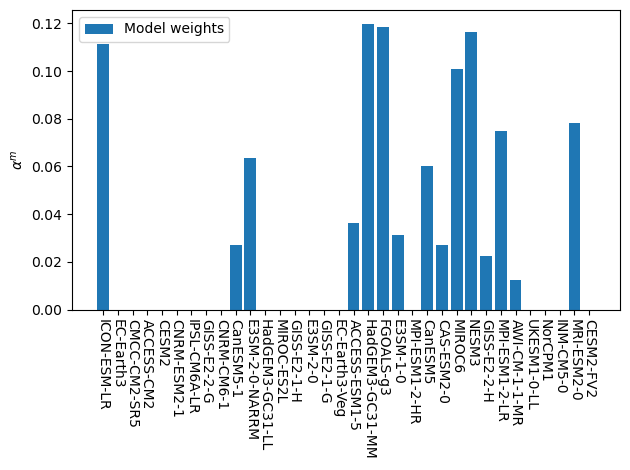

In [9]:
# display histogram of values in weights
# plt.figure()
# plt.hist(weights_robust_best_worst_to_plot, bins=50)
# plt.title("Histogram of weights for robust regression")
# plt.xlabel("Value")
# plt.ylabel("Frequency")

fig, ax = plt.subplots()
ax.bar(list(weights_robust_best_worst_tmp.keys()), weights_robust_best_worst_to_plot.detach().numpy(),label='Model weights')
ax.set_ylabel(r'$\alpha^m$')
ax.legend()
ax.set_xticklabels(list(weights_robust_best_worst_tmp.keys()), rotation=-90)
plt.tight_layout()
# plt.savefig("results/weights_"+str(mu_)+"_"+str(lambda_)+".eps", dpi=150)
plt.show()



# plt.savefig("results/robust/histogram_weights_robust.png")
# plt.close()


## Define the weights 